In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline 

In [4]:
import importlib
import ids_common
importlib.reload(ids_common)


<module 'ids_common' from 'd:\\stuff\\univ\\ids\\ids_common.py'>

In [3]:
df = pd.read_csv('./dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)
df.shape



(2219201, 63)

ML-EdgeIIoT-dataset

In [107]:
SEED = random.randint(0, 42424242)
SEED = 19884136
print(f'SEED = {SEED}')

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'

SEED = 19884136


Dummy classifier

In [124]:
y_dt_score = dt_cls.predict_proba(X_test)[:, 1]  
y_dt_best_score = dt_best.predict_proba(X_test)[:, 1]  

fpr1, tpr1, _ = roc_curve(y_test, y_dt_score)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_dt_best_score)
roc_auc2 = auc(fpr2, tpr2)

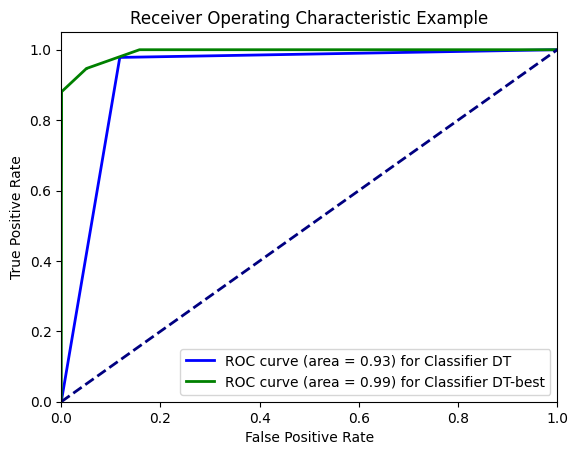

In [125]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label='ROC curve (area = %0.2f) for Classifier DT' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (area = %0.2f) for Classifier DT-best' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

15 classes

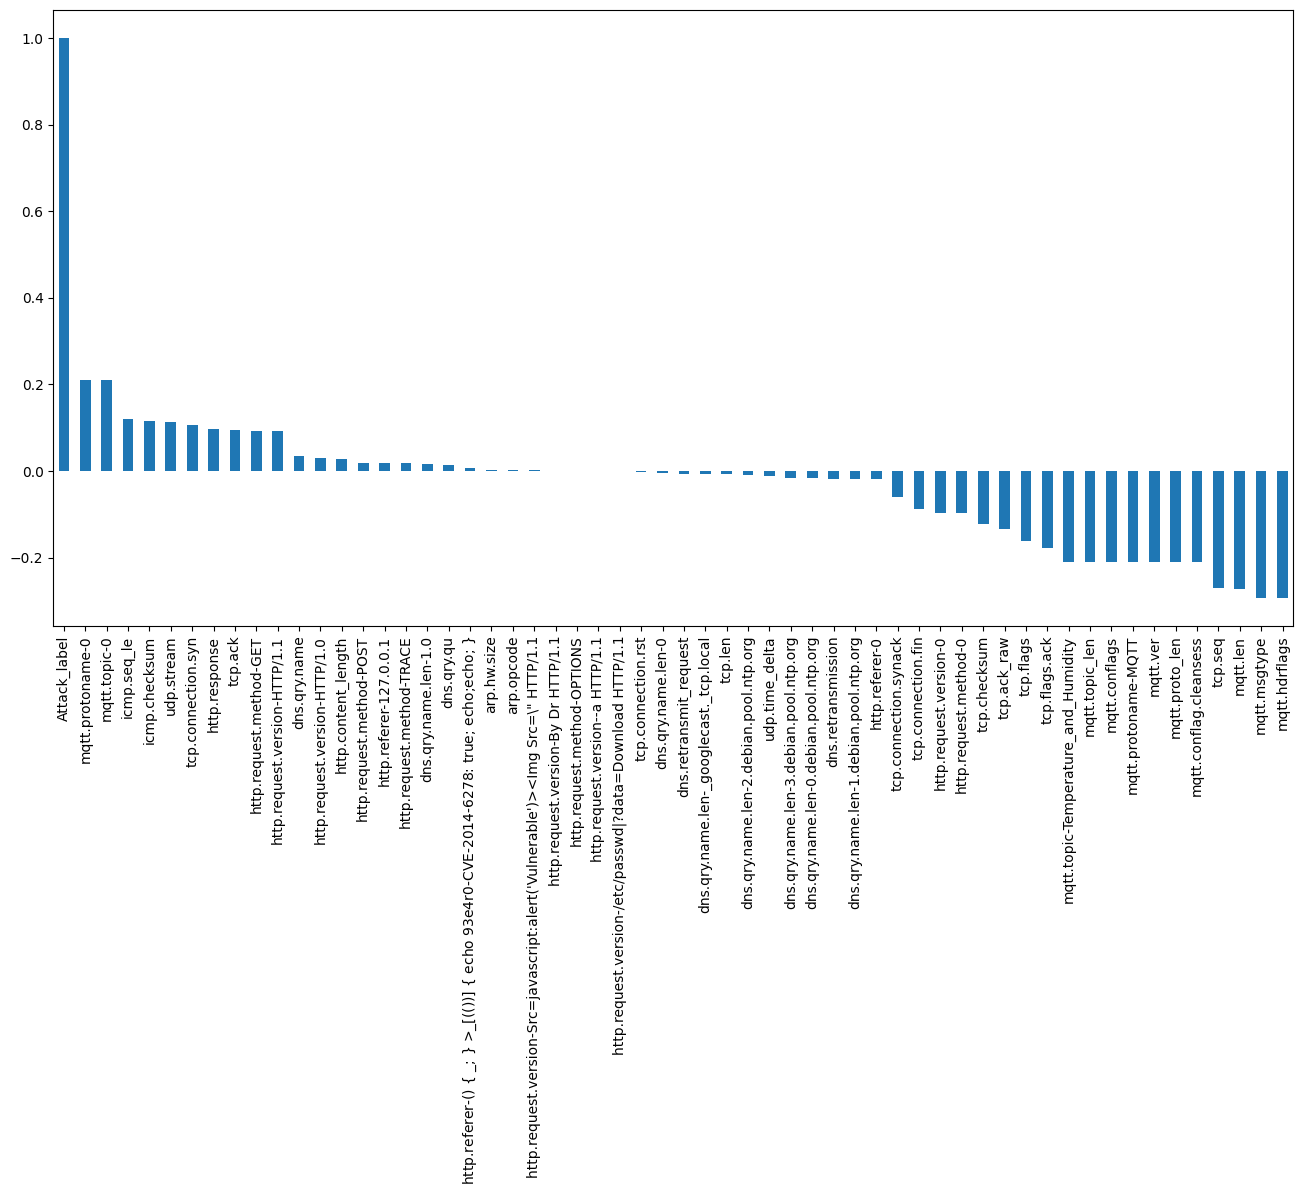

Attack_label                                                                         1.000000
mqtt.protoname-0                                                                     0.209794
mqtt.topic-0                                                                         0.209455
icmp.seq_le                                                                          0.121136
icmp.checksum                                                                        0.116376
udp.stream                                                                           0.114264
tcp.connection.syn                                                                   0.107291
http.response                                                                        0.096792
tcp.ack                                                                              0.094671
http.request.method-GET                                                              0.092900
http.request.version-HTTP/1.1                               

In [75]:

tdf = df.drop([target_label_15_class], axis=1, inplace=False).copy()
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


corr = tdf.corr()
corr = corr[target_label_2_class]

corr = corr.sort_values(ascending=False)

ax = corr.plot.bar(figsize=(16, 8))
# ax.bar_label(ax.containers[0])

plt.xticks(rotation=90)
plt.show()

print(corr)
